In [71]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.figure_factory as ff
from scipy import stats

init_notebook_mode(connected=True)

In [40]:
Degree_df = pd.read_csv("d:/UCSD_ECE143/project/degrees-that-pay-back.csv")
College_df = pd.read_csv("d:/UCSD_ECE143/project/salaries-by-college.csv")

#State_df = pd.read_csv("d:/UCSD_ECE143/project/salaries-by-state.csv")

In [3]:
def string_dollar_to_integer(data, column):
    '''
    change string dollar to integer dollar
    example : $75,000.00 to 75000
    data: pandas.core.frame.DataFrame
    column: valid column name in data
    '''
    assert isinstance(column, str)
    assert data.columns.contains(column)
    data[column] = data[column].apply(lambda x: int(x.replace(",","").strip('$').split('.')[0]) if isinstance(x, str) else x)

In [42]:
for df in [Degree_df, College_df]:
    string_dollar_to_integer(df, 'Starting Median Salary')
    string_dollar_to_integer(df, 'Mid-Career Median Salary')
    string_dollar_to_integer(df, 'Mid-Career 10th Percentile Salary')
    string_dollar_to_integer(df, 'Mid-Career 25th Percentile Salary')
    string_dollar_to_integer(df, 'Mid-Career 75th Percentile Salary')
    string_dollar_to_integer(df, 'Mid-Career 90th Percentile Salary')


In [43]:
def visulize_region_difference(College_df, stage_str):
    '''
    College_df : pandas.core.frame.DataFrame
    stage_str: str
    plot state vs salaries
    '''
    State_group = College_df.groupby(['State'])
    state = State_group[stage_str].mean().index
    value = State_group[stage_str].mean().values
    
    data = dict(type = 'choropleth',
               locations = state,
               locationmode = 'USA-states',
               colorscale = 'Portland',#['Greys', 'YlGnBu', 'Greens', 'YlOrRd', 'Bluered', 'RdBu',
            #'Reds', 'Blues', 'Picnic', 'Rainbow', 'Portland', 'Jet',
            #'Hot', 'Blackbody', 'Earth', 'Electric', 'Viridis', 'Cividis'],
               text = state,
               marker = dict (line = dict(color = 'rgb(255,255,255)',width=2)),
               z = value,
               colorbar = {'title': stage_str})

    layout = dict(title = 'Region wise divide to show '+ stage_str,
             geo=dict(scope = 'usa')) 

    choromap2 = go.Figure(data = [data],layout=layout)
    iplot(choromap2)

In [44]:
visulize_region_difference(College_df, 'Starting Median Salary')

In [45]:
visulize_region_difference(State_df, 'Mid-Career Median Salary')

In [46]:
import scipy
from scipy.optimize import curve_fit

In [177]:
def visulize_schooltype_difference(College_df, stage_str):
    '''
    College_df : pandas.core.frame.DataFrame
    stage_str: str
    plot state vs school type
    '''
    
    Public_df = College_df[College_df['School Type']=='Public']
    Private_df = College_df[College_df['School Type']=='Private']
    
    sns.set(style="ticks")
    sns.set(style="darkgrid")
    # Set up the figure
    f, ax = plt.subplots()
    #ax.set_aspect("equal")

    # 
    ax = sns.distplot(Public_df[stage_str].values, bins=12, kde=False, fit=stats.gamma, label='Public');
    ax = sns.distplot(Private_df[stage_str].values, bins=12, kde=False, fit=stats.gamma, label='Private');
    ax.set_xlabel(stage_str)
    plt.legend()
    #ax = sns.jointplot(Public_df["Starting Median Salary"].values, Public_df["Mid-Career Median Salary"].values, color="#4CB391", ax=ax)
    #ax = sns.jointplot(Private_df["Starting Median Salary"].values, Private_df["Mid-Career Median Salary"].values, ax=ax)

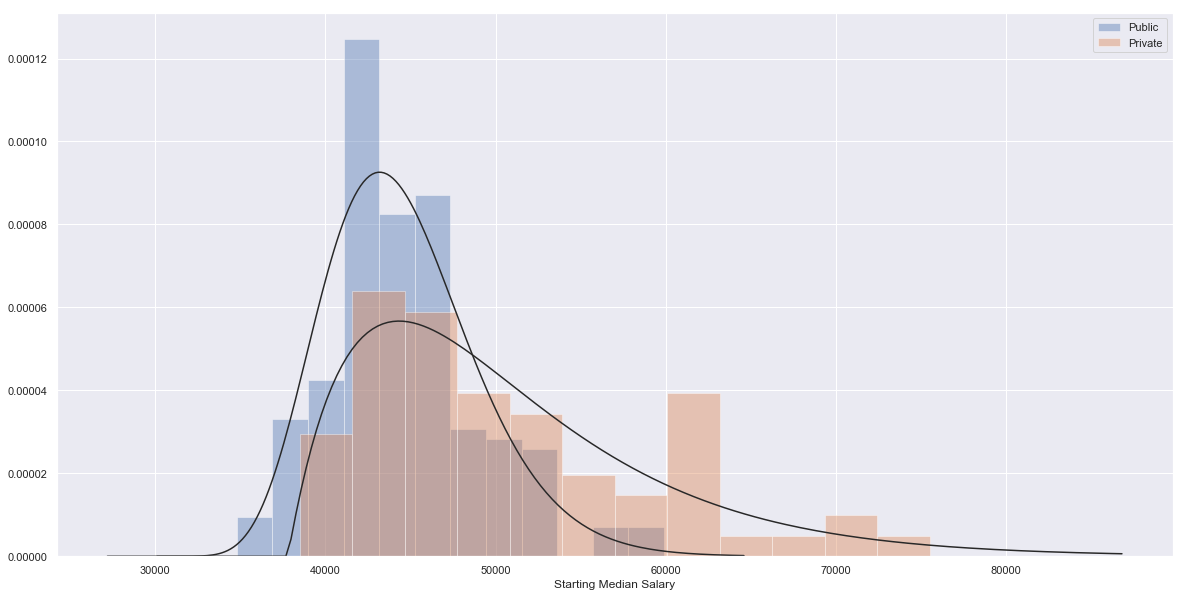

In [178]:
visulize_schooltype_difference(College_df, "Starting Median Salary")

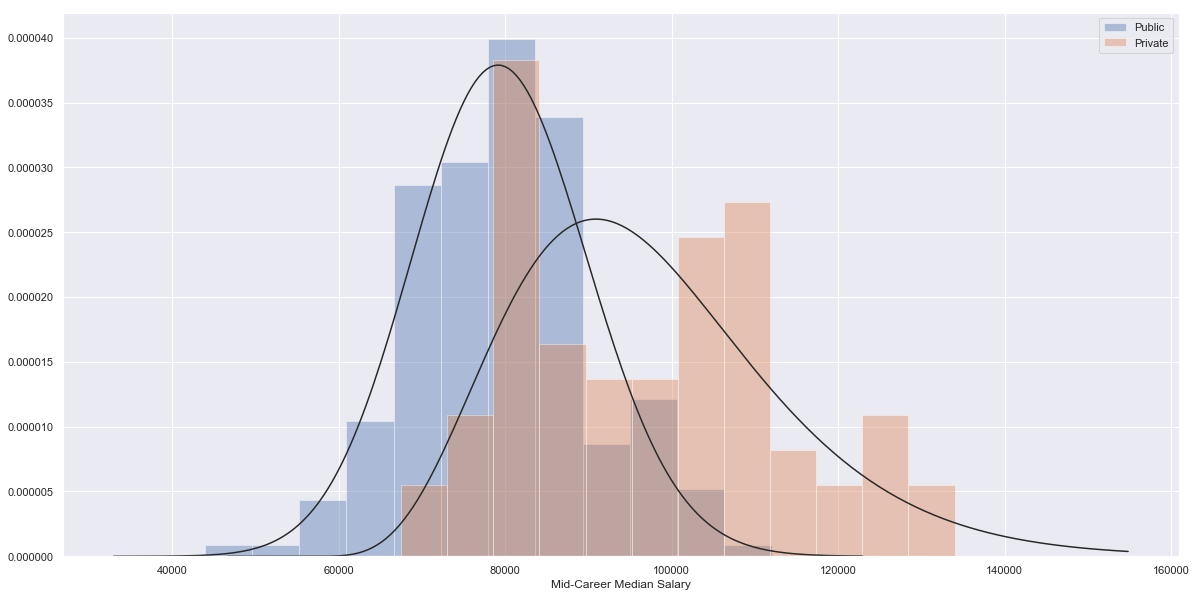

In [179]:
visulize_schooltype_difference(College_df, "Mid-Career Median Salary")

In [175]:
def visulize_major_difference(Degree_df):
    Degree_df = Degree_df.sort_values(by=['Mid-Career Median Salary', 'Starting Median Salary'])
    Median_df = pd.melt(Degree_df, id_vars=['Undergraduate Major'], 
                        value_vars=['Starting Median Salary', 'Mid-Career Median Salary'], var_name='Stage', value_name='Median Salary')
    sns.set(style="ticks")
    sns.set(style="darkgrid")
    sns.relplot(y='Undergraduate Major', x='Median Salary', hue='Stage', 
                height=10, aspect=1, size="Median Salary", sizes=(15, 200), data=Median_df)

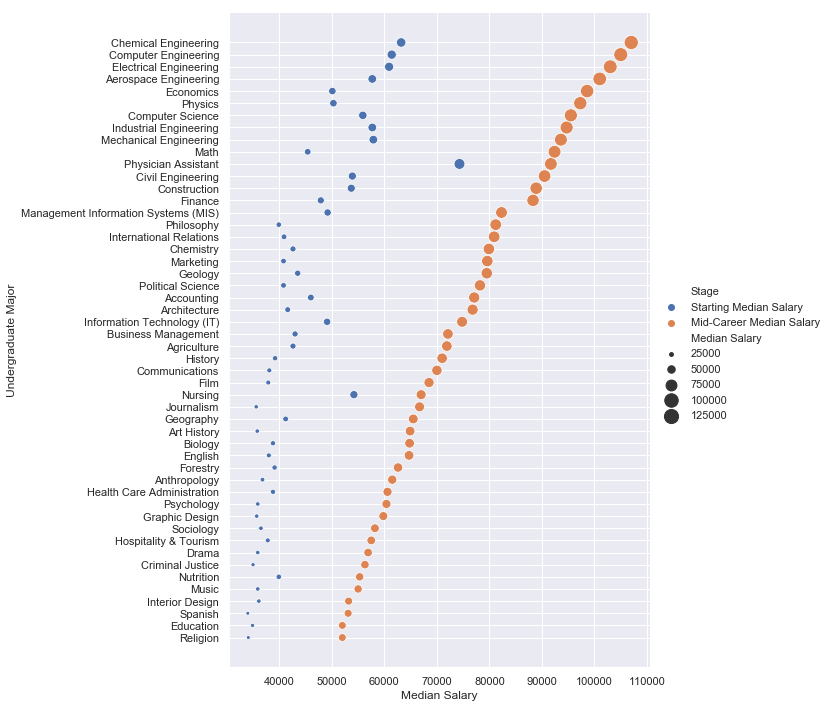

In [176]:
visulize_major_difference(Degree_df)

In [180]:
def visulize_starting_mid_difference1(Degree_df):
    '''
    Degree_df : pandas.core.frame.DataFrame
    plot percent of increase of starting salaries and mid-career salaries.
    '''
    Feature = Degree_df['Undergraduate Major']
    weightage = Degree_df['Starting Median Salary']
    total = Degree_df['Mid-Career Median Salary']
    percent = Degree_df['Percent change from Starting to Mid-Career Salary']
    mid_pos = (Degree_df['Starting Median Salary'] + Degree_df['Mid-Career Median Salary']) / 2
    weightage = np.array(weightage)
    Feature = np.array(Feature)
    total = np.array(total)
    percent = np.array(percent)
    mid_pos  = np.array(mid_pos)

    idx = weightage.argsort()
    Feature, total, percent, mid_pos, weightage = [np.take(x, idx) for x in [Feature, total, percent, mid_pos , weightage]]
    s = 1
    size=[]
    for i, cn in enumerate(weightage):
        s = s + 1        
        size.append(s)
    fig, ax = plt.subplots(figsize=(8, 16))
    plt.grid(True)
    ax.scatter(total,size,marker=".", s=size, linewidths=10)
    ax.scatter(weightage,size,marker=".", s=size, linewidths=10)
    ax.set_xlabel('Median Salary')
    ax.set_ylabel('Undergraduate Major')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    for i, txt in enumerate(Feature):
        ax.annotate(txt, (110000,size[i]),fontsize=12,rotation=0)
        ax.annotate('.', xy=(total[i], size[i]), xytext=(weightage[i], size[i]),
            arrowprops=dict(facecolor='Gray'),
            )
    for i, pct in enumerate(percent):
         ax.annotate(pct, (mid_pos[i],size[i]),horizontalalignment='center',fontsize=12,rotation=0)

    ax.annotate('Starting median Salary', (35000,52),fontsize=14,rotation=0)
    ax.annotate('Mid-Career median Salary', (35000,53),fontsize=14,rotation=0);
    ax.annotate('.', xy=(110000, 52.5), xytext=(68000, 52.5),
                arrowprops=dict(facecolor='Gray'),)
    ax.annotate('Percent increase in the salary', (70000,53),fontsize=14,rotation=0);

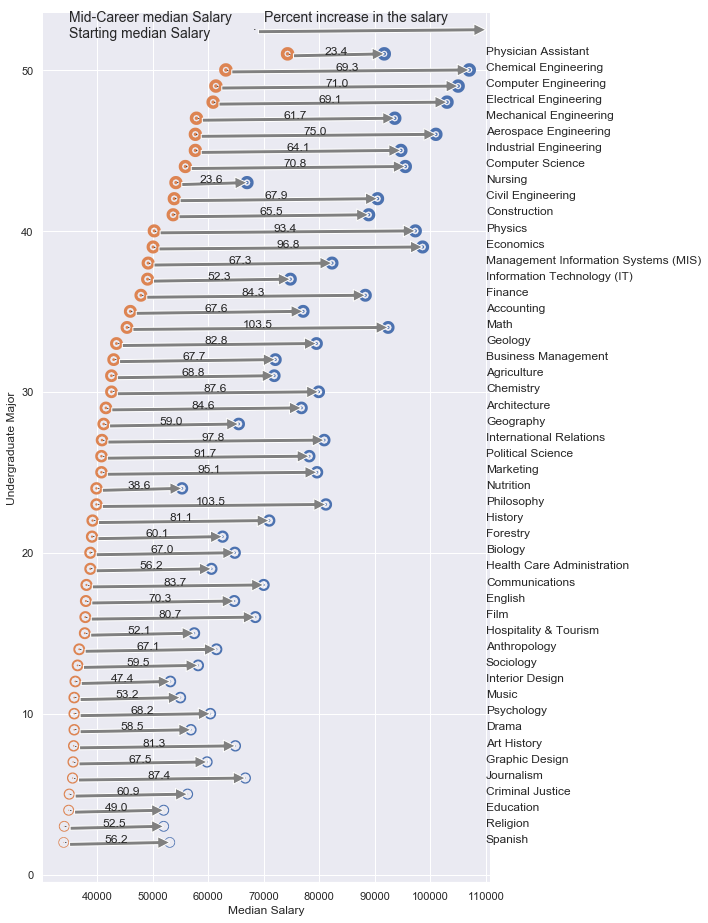

In [181]:
visulize_starting_mid_difference1(Degree_df)

In [173]:
def visualize_salaries_increase_detail(Degree_df):
    '''
    Degree_df : pandas.core.frame.DataFrame
    plot 
    '''
    Degree_df = Degree_df.sort_values(by=['Mid-Career Median Salary', 'Mid-Career 75th Percentile Salary', 'Mid-Career 25th Percentile Salary'])
    Mid_Career_df = pd.melt(Degree_df, 
                        id_vars=['Undergraduate Major'], 
                        value_vars=['Mid-Career 10th Percentile Salary',
                                    'Mid-Career 25th Percentile Salary', 
                                    'Mid-Career Median Salary', 
                                    'Mid-Career 75th Percentile Salary',
                                    'Mid-Career 90th Percentile Salary'], 
                        var_name='Percentile', 
                        value_name='Mid-Career Salary')

    sns.set(style="ticks")
    sns.set(style="darkgrid")
    sns.relplot(y='Undergraduate Major', x='Mid-Career Salary', hue='Percentile', 
                height=10, aspect=1, size="Mid-Career Salary", sizes=(15, 200), data=Mid_Career_df)

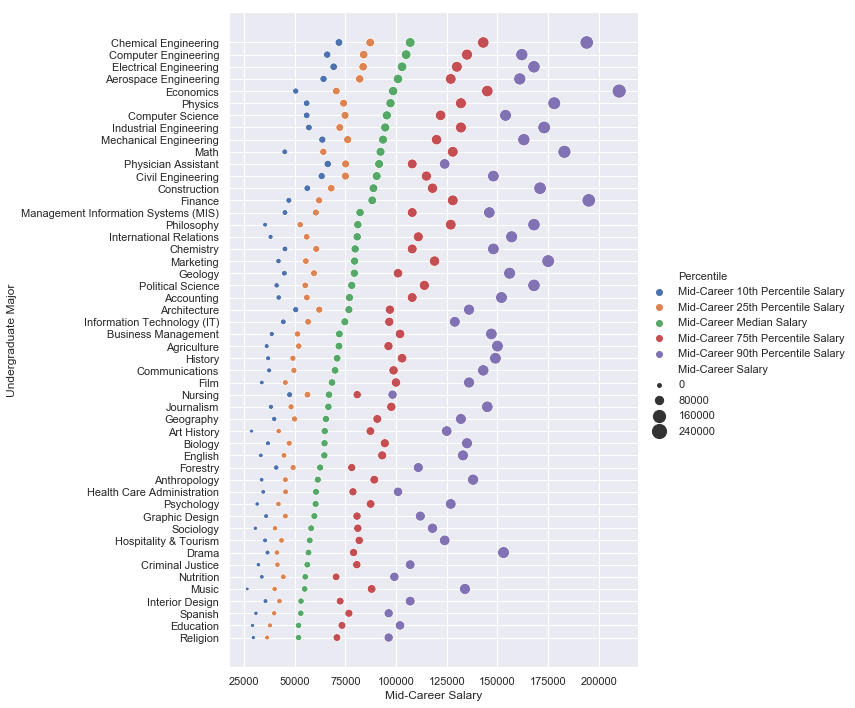

In [174]:
visualize_salaries_increase_detail(Degree_df)